In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
import sys
import import_ipynb
import cardChoice
import traceback
from datetime import datetime

import matplotlib.pyplot as plt
#traceback.print_stack()


In [6]:
def log_traceback(ex, sim):
    tb_lines = traceback.format_exception(ex.__class__, ex, ex.__traceback__)
    tb_text = ''.join(tb_lines)
    # I'll let you implement the ExceptionLogger class,
    # and the timestamping.
    print(tb_text)
    print("info: ")
    print("\t",sim.p1.turn)
    print("\t",sim.shop.cards)
    print("\t",sim.shop.checkEnd())
    print("\tp1")
    print("\t",sim.p1.hand)
    print("\t",sim.p1.deck)
    print("\t",sim.p1.discard)
    print("\tp2")
    print("\t",sim.p2.hand)
    print("\t",sim.p2.deck)
    print("\t",sim.p2.discard)



In [7]:
model = Sequential()
model.add(Dense(20, activation='sigmoid', input_shape=(18,)))
model.add(Dense(64, activation='linear'))
model.add(Dense(64, activation='linear'))
#model.add(Dense(512, activation='relu'))
#model.add(Dense(256, activation='relu'))
#model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [20]:
y = 0.95
eps = 0.5
decay_factor = 0.999
game_lengths = []
num_episodes = 1000
start = datetime.now()
for i in range(num_episodes):
    sim = cardChoice.Simulation()
    eps *= decay_factor
    if (i+1) % 100 == 0:
        print("Episode {} of {}".format(i + 1, num_episodes))
    done = False
    turns = 0
    while not done:
        if sim.p1.turn == sim.p2.turn:
            player = sim.p1
        else: 
            player = sim.p2
        current_state = np.array(sim.getBuyState(player))
        if np.random.random() < eps:
            action = np.random.randint(0, 4)
        else:
            action = np.argmax(model.predict(current_state))
        try:
            new_state, reward, done = sim.makeDecision(player, action)
            new_state = np.array(new_state)
        except Exception as ex:
            log_traceback(ex, sim)
            sys.exit()
        target = reward + y * np.max(model.predict(new_state))
        target_vec = model.predict(current_state)[0]
        target_vec[action] = target
        model.fit(current_state, target_vec.reshape(-1, 4), epochs=1, verbose=0)
    game_lengths.append(sim.p1.turn)

finish = datetime.now()
print("Time =", str(finish-start))

x=range(1,1+num_episodes)
y=game_lengths



Episode 100 of 1000
Episode 200 of 1000
Episode 300 of 1000
Episode 400 of 1000
Episode 500 of 1000
Episode 600 of 1000
Episode 700 of 1000
Episode 800 of 1000
Episode 900 of 1000
Episode 1000 of 1000
Time = 0:08:25.455708


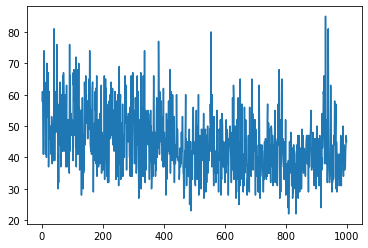

In [21]:
# Area plot
x=range(1,1+num_episodes)
y=game_lengths
plt.plot(x, y)


In [22]:
import statistics as math
def subgraph(interval, num_episodes, y):
    avgs = []
    for i in range(int(num_episodes/interval)):
        avgs.append(math.mean(y[i*interval:(i+1)*interval]))
    plt.plot(range(1,1+len(avgs)), avgs)

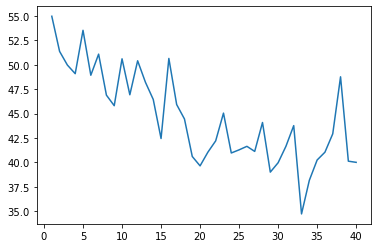

In [24]:
subgraph(25, num_episodes, game_lengths)

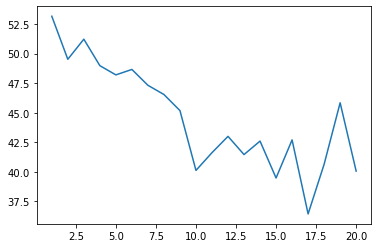

In [25]:
subgraph(50, num_episodes, game_lengths)